# Introduction

The dataset provides data of 9 subjects that conduct 18 different physical activities. While they are conducting these activities, they are wearing 3 inertial measurement unit (IMU) sensors on their hand, chest and ankle along with a heart rate monitor. The IMU sensors consists of an accelerometer (measures acceleration), gyroscope (measures angular velocity) and magnetometer (measures strength and direction of the magnetic field in the vicinity). The analysis of the data will provide actionable insights on the amount and type of physical activity carried out by these individuals. 

There is currently a huge market for physical exercise and staying fit. One of the most common techniques to stay fit is to go on regular outdoor runs. In fact, over lockdown there has been a big surge in outdoor cardiovascular activities, primarily due to the closure of gyms. This includes activities promoted on social media such as running 5km for the NHS. There are apps such as Strava which give insightful analysis and tracking of outdoor walks/jogs/runs/cycles. The aim/purpose of this report is to use the dataset provided to classify different activities and determine the intensity of outdoor cardiovascular activities carried out by an individual, for example outdoor jogging. The expected outcome is that a model is identified which can predict the intensity of outdoor cardiovascular exercise. 

# Handling missing and dirty data

The readme.pdf file provides information on the data that should be discarded from this dataset. The first is the 3D-acceleration data that uses a scale of ±6g. It is recommended that we use the accelerometer with the scale of ±16g instead of the ±6g. Therefore I am going to discard the columns that use this type of accelerometer. These are columns with the title of IMU hand, chest and ankle 3D acceleration data (4),(5) and (6). Next, the IMU sensory data for orientation is invalid in this data collection thus it will also be discarded. Additionally, data labelled with ActivityID=0 will also be discarded. The focus of this report is not on the time series of each activity. However it is important to be mindful of how long each activity was performed by the subject. Since a lot of our data analysis takes the mean of a particular sensor data, the difference in times for each activity doesn't have to be identical but it should be above a certain value. For example subject 106 performs the rope jumping activity for 2 seconds which is not adequate for meaningful analysis. The minimum time required for activity performed by a subject has to exceed 60 seconds for it to be considered in the exploratory data analysis. Removal of this data is all done below. Missing data is already labelled with N/A therefore further handling of this data is not required. 

In [49]:
#Import relevant libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd    
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
my_list=[]
files = ('C:/Users/saksh/Downloads/subject101_protocol.csv', 'C:/Users/saksh/Downloads/subject102.csv', 'C:/Users/saksh/Downloads/subject103.csv', 'C:/Users/saksh/Downloads/subject104.csv', 'C:/Users/saksh/Downloads/subject105.csv', 'C:/Users/saksh/Downloads/subject106.csv', 'C:/Users/saksh/Downloads/subject107.csv', 'C:/Users/saksh/Downloads/subject108.csv', 'C:/Users/saksh/Downloads/subject109.csv')

dfs_names = ('df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9')
#age to work out percentage max HR for later on
age = (27,25,31,24,26,26,23,32,31)
#dictionary dfs to store each subject...eg subject one is dfs['df1']
dfs ={}
#for loop to read each subject, label columns and eliminate any dirty data
for dfn,file,ages in zip(dfs_names, files, age):
#read data from a csv file
    dfs[dfn] = pd.read_csv(file)
#the readme.pdf provides the labels for each column
    dfs[dfn].columns = ['Timestamp (s)', 'ActivityID', 'Heart rate (bpm)', 'IMU hand temperature', 'IMU hand 3D-acceleration data (1)', 'IMU hand 3D-acceleration data (2)', 'IMU hand 3D-acceleration data (3)',  'IMU hand 3D-acceleration data (4)', 'IMU hand 3D-acceleration data (5)', 'IMU hand 3D-acceleration data (6)', 'IMU hand 3D-gyroscope data (1)', 'IMU hand 3D-gyroscope data (2)',  'IMU hand 3D-gyroscope data (3)', 'IMU hand 3D-magnetometer data (1)', 'IMU hand 3D-magnetometer data (2)', 'IMU hand 3D-magnetometer data (3)', 'IMU hand orientation (1)', 'IMU hand orientation (2)', 'IMU hand orientation (3)', 'IMU hand orientation (4)', 'IMU chest temperature', 'IMU chest 3D-acceleration data (1)', 'IMU chest 3D-acceleration data (2)', 'IMU chest 3D-acceleration data (3)',  'IMU chest 3D-acceleration data (4)', 'IMU chest 3D-acceleration data (5)', 'IMU chest 3D-acceleration data (6)',  'IMU chest 3D-gyroscope data (1)',  'IMU chest 3D-gyroscope data (2)',  'IMU chest 3D-gyroscope data (3)', 'IMU chest 3D-magnetometer data (1)', 'IMU chest 3D-magnetometer data (2)', 'IMU chest 3D-magnetometer data (3)', 'IMU chest orientation (1)', 'IMU chest orientation (2)', 'IMU chest orientation (3)', 'IMU chest orientation (4)', 'IMU ankle temperature', 'IMU ankle 3D-acceleration data (1)', 'IMU ankle 3D-acceleration data (2)', 'IMU ankle 3D-acceleration data (3)',  'IMU ankle 3D-acceleration data (4)', 'IMU ankle 3D-acceleration data (5)', 'IMU ankle 3D-acceleration data (6)',  'IMU ankle 3D-gyroscope data (1)',  'IMU ankle 3D-gyroscope data (2)',  'IMU ankle 3D-gyroscope data (3)',  'IMU ankle 3D-magnetometer data (1)', 'IMU ankle 3D-magnetometer data (2)', 'IMU ankle 3D-magnetometer data (3)', 'IMU ankle orientation (1)', 'IMU ankle orientation (2)', 'IMU ankle orientation (3)', 'IMU ankle orientation (4)']
#drop columns and values that are not required for exploratory data analysis
    dfs[dfn].drop(['IMU hand 3D-acceleration data (4)', 'IMU hand 3D-acceleration data (5)', 'IMU hand 3D-acceleration data (6)', 'IMU hand orientation (1)', 'IMU hand orientation (2)', 'IMU hand orientation (3)','IMU hand orientation (4)', 'IMU chest 3D-acceleration data (4)', 'IMU chest 3D-acceleration data (5)', 'IMU chest 3D-acceleration data (6)', 'IMU chest orientation (1)', 'IMU chest orientation (2)', 'IMU chest orientation (3)','IMU chest orientation (4)', 'IMU ankle 3D-acceleration data (4)', 'IMU ankle 3D-acceleration data (5)', 'IMU ankle 3D-acceleration data (6)', 'IMU ankle orientation (1)', 'IMU ankle orientation (2)', 'IMU ankle orientation (3)','IMU ankle orientation (4)'], axis=1, inplace=True)
    dfs[dfn].drop(dfs[dfn][dfs[dfn]['ActivityID'] == 0].index, inplace=True)
#Only using physical movement activities for data analysis---- Change ActivityID depending on the interested activity for the whole report.
    #dfs[dfn].query(' ActivityID == 3|ActivityID == 4|ActivityID == 5|ActivityID == 7', inplace=True)
    #dfs[dfn].query('ActivityID == 3|ActivityID == 4|ActivityID == 5|ActivityID == 6|ActivityID == 7|ActivityID == 12| ActivityID == 13|ActivityID == 24', inplace=True)
    dfs[dfn].query('ActivityID == 3|ActivityID == 4|ActivityID == 5|ActivityID == 7|ActivityID == 12| ActivityID == 13', inplace=True)
#Additional columns for further data analysis
    dfs[dfn]['gyroscope mean ankle']= dfs[dfn][['IMU ankle 3D-gyroscope data (1)','IMU ankle 3D-gyroscope data (2)','IMU ankle 3D-gyroscope data (3)']].mean(axis=1)
    dfs[dfn]['magnetometer mean ankle']= dfs[dfn][['IMU ankle 3D-magnetometer data (1)','IMU ankle 3D-magnetometer data (2)','IMU ankle 3D-magnetometer data (3)']].mean(axis=1)
    dfs[dfn]['acceleration magnitude ankle']=np.sqrt(pow(dfs[dfn]['IMU ankle 3D-acceleration data (1)'],2) + pow(dfs[dfn]['IMU ankle 3D-acceleration data (2)'],2) + pow(dfs[dfn]['IMU ankle 3D-acceleration data (3)'],2))-9.81
    dfs[dfn]['Percentage Max HR']= (dfs[dfn]['Heart rate (bpm)']/(220- (ages)))*100
#drop the activities performed by subject which does not exceed 60 seconds
dfs['df6'].drop(dfs['df6'][dfs['df6']['ActivityID'] == 24].index, inplace=True)
dfs['df7'].drop(dfs['df7'][dfs['df7']['ActivityID'] == 5].index, inplace=True)

# Exploratory data anlaysis

There are many ways to analyse different aspects of this data and provide actionable insights. For the sake of brevity, I will provide meaningful insights related to the aims of the report i.e. for individuals going on outdoor walks/jogs/runs. The protocol dataset has a broad range of physical activity from walking, running, cycling, ascending/descending stairs, folding laundry and rope jumping. Evidently all these activities require different kinds of motions. To develop an algorithm that tries to identify these different activities we need to categorise them based on their motions. Firstly there is the stationary category which includes lying, sitting, standing, computer work. This category is a useful control variable for comparison against the more active categories. Next there is the physical movement category which includes walking, running, Nordic walking, ascending stairs, descending stairs, cycling and rope jumping. This is our category of interest. Additionally we have the house chores category which involves vacuuming, ironing, folding laundry and house cleaning. Activities were excluded from the list, such as car driving, watching TV and playing soccer, since they did not have a large enough sample size (n= 1 or 2). 

The focus for my data analysis is on the physical movement category since insights from this data have more real world applications and are consistent with the aims of this report. Again we can divide this category into subcategories. Natural movement category looks at walking, Nordic walking, ascending stairs, descending stairs and running.  Cycling and rope jumping are different kinds of motions however they are still cardiovascular activities. We can conduct hypotheses and form models based on our findings from the exploratory data analysis. When there are many variables/dimensions it is best to use Principle Component Analysis (PCA) for exploratory data analysis. The corresponding activity to it's ```ActivityID``` will be labelled and color coded on each graph.

An accurate representaion of the physical movement category will make use of the IMU sensor located in the ankle since natural movement requires motions of the ankle/leg. We will explore the three main IMU 3-D sensors, which are the accelerometer, gyroscope and magnetometer for the physical movement category.

## IMU ankle 3-D acceleration data

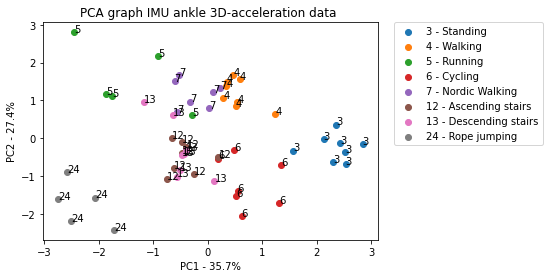

In [8]:
#convert to dataframe df1
df1 = pd.DataFrame()
#variables of interest
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','IMU ankle 3D-acceleration data (1)','IMU ankle 3D-acceleration data (2)', 'IMU ankle 3D-acceleration data (3)']].mean())
    df1 = pd.concat([df, df1]) #concatenate to df1
df1 = df1.dropna()
df1 = df1.reset_index()
scaled_data = preprocessing.scale(df1)
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #the variance of PCA axis
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data)
pca_df.columns= ['PC1', 'PC2','PC3', 'PC4', 'ActivityID']
pca_df['ActivityID']=(df1['ActivityID'])
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping'] 
plt.figure()
for (i,j) in zip(np.unique(pca_df['ActivityID']), activity):
    plt.scatter(x = pca_df.query(f"ActivityID=={i}")['PC1'], y= pca_df.query(f"ActivityID=={i}")['PC2'], label = f"{i} - {j}",  cmap='plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('PCA graph IMU ankle 3D-acceleration data ')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (pca_df['PC1'].loc[i], pca_df['PC2'].loc[i]) )
plt.show()

The PCA graph above consists of the three axis (x,y,z) for IMU ankle 3D-acceleration data grouped by ActivityID number. The PCA axis only explains 61.2% of the variance, thus other factors may be present that are not considered in this plot. The PCA graph shows most of the physical movement activities clustered together. Therefore the acceleration ankle data is a good tool to classify activities in this category. We have only included the activities corresponding to standing (control), walking, Nordic walking, running, ascending stairs, descending stairs and rope jumping in this data since these are the physical movement activities and the activities related to the aims of report.

Acceleration is a vector value, meaning it has both magnitude and direction. We are only interested in the magnitude of acceleration thus we use the formula:
$\sqrt{x^2+y^2+z^2}-1g$ (Wu et al., 2012).
Subtracting 1g (9.81) eliminates the Earth's gravity from the magnitude. We can calulculate the mean of the magnitude of acceleration to get a single acceleration ankle magnitude value for all three axis. This can be plotted against the heart rate, as done below.

Text(0.5, 1.0, 'Classifying the intensity of physical movement activities')

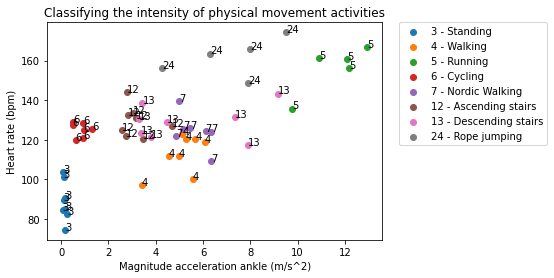

In [9]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','acceleration magnitude ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()#drop N/A values
df1 = df1.reset_index()
#label of each ActivityID
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping']
plt.figure()
#scatter graph of the variables of interest grouped by ActvityID
for (i,j) in zip(np.unique(df1['ActivityID']), activity):
    plt.scatter(x = df1.query(f"ActivityID=={i}")['acceleration magnitude ankle'], y=df1.query(f"ActivityID=={i}")['Heart rate (bpm)'], label = f"{i} - {j}" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#Annotation of ActivityID for each point in scatter graph
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['Heart rate (bpm)'][i]) )
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Heart rate (bpm)')
plt.title('Classifying the intensity of physical movement activities')

There seems to be positive correlation between IMU acceleration magnitude in the ankle and heart rate in the physical movement activities. Most activities are generally clustered well together. This plot is a good representation of the intensity of natural movement activity. For example standing (3) forms its own cluster with no ankle acceleration magnitude and low heart rate since there is no movement. However walking (4), Nordic walking (7), ascending and descending stairs (12 and 13) form their own cluster with medium ankle acceleration magnitude and heart rate since this involves movement at walking pace. At high ankle acceleration magnitude and heart rate there is running activity (5). Again this makes sense since it requires movement at a much faster pace. Thus this plot is a good indication of the intensity of movement and can be used to classify standing vs walking vs running natural movements. Someone going for an outdoor walk/jog/run would want to know how intensely they are exercising and these variables are good classifiers. Therefore we can test a hypothesis on this theme and use K-means/agglomerative clustering model to classify each activity. Cycling has a suprisingly low magnitude of acceleration, similar to that of standing, yet a much higher average heart rate. Since cycling is not a natural motion, i.e. it requires the use of a vehicle, the magnitude acceleration is not the best indicator of this activity. Additionally, the magnitude of acceleration for rope jumping data is very spread out hence it doesnt't classify this activity well either. Both these activities (cycling and rope jumping) are different kinds of motions to the other activities in physical movement category which may explain why these activities are not well represented by the magnitude acceleration of the ankle. 

## IMU ankle 3-D gyroscope data

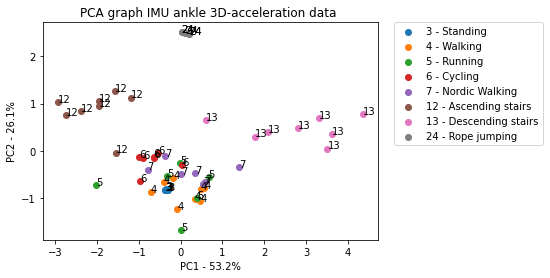

In [214]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['IMU ankle 3D-gyroscope data (1)','IMU ankle 3D-gyroscope data (2)', 'IMU ankle 3D-gyroscope data (3)']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
df1 = df1.reset_index()
scaled_data = preprocessing.scale(df1)
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #the variance of PCA axis
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data)
pca_df.columns= ['PC1', 'PC2','PC3', 'PC4']
pca_df['ActivityID']=(df1['ActivityID'])
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping']
plt.figure()
for (i,j) in zip(np.unique(pca_df['ActivityID']), activity):
    plt.scatter(x = pca_df.query(f"ActivityID=={i}")['PC1'], y= pca_df.query(f"ActivityID=={i}")['PC2'], label = f"{i} - {j}",  cmap='plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('PCA graph IMU ankle 3D-acceleration data ')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (pca_df['PC1'].loc[i], pca_df['PC2'].loc[i]) )
plt.show()

The PCA gyroscope data shows clear activity differences in  ascending stairs vs descending downstairs (12 and 13). This makes sense since gyroscope measures angular velocity which is a good measure of inclination. Additionally, rope jumping activity is clustered together in this group. The differences in other natural movement activities are not clear thus gyroscope on the ankle is not the best tool for classification of these activities. For further exploratory analysis of ankle gyroscope we will use the mean value of the three axis against heart rate.

Text(0.5, 1.0, 'Ascending vs descending stairs')

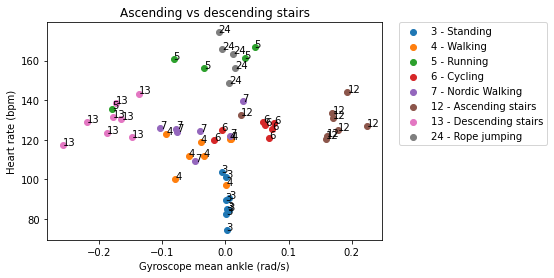

In [216]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','gyroscope mean ankle', 'acceleration magnitude ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna() #drop N/A values
df1 = df1.reset_index()
#label of each ActivityID
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping']
plt.figure()
#scatter graph of the variables of interest grouped by ActvityID
for (i,j) in zip(np.unique(df1['ActivityID']), activity):
    plt.scatter(x = df1.query(f"ActivityID=={i}")['gyroscope mean ankle'], y=df1.query(f"ActivityID=={i}")['Heart rate (bpm)'], label = f"{i} - {j}" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#Annotation of ActivityID for each point in scatter graph
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['gyroscope mean ankle'][i], df1['Heart rate (bpm)'][i]) )
plt.xlabel('Gyroscope mean ankle (rad/s)')
plt.ylabel('Heart rate (bpm)')
plt.title('Ascending vs descending stairs')

The gyroscope sensor in the ankle is a good indicator of incline and decline activities. Ascending stairs (12) has positive gyroscope mean value and descending stairs (13) has negative gyroscope mean value. Both activities also have similar mean heart rate level. The other activities do not seem to have much elevation levels when compared to ascending and descending stairs. Therefore mean gyroscope in ankle is a very good classifier of activities that involve incline/decline in the physical movement category. We can form a hypothesis which suggests that gyroscope data is significantly different for movements that involve incline compared to a decline and test this using T-test. This will be conducted in hypothesis testing section. We can combine the gyroscope mean ankle data and the magnitude acceleration ankle data for further analysis.

Text(0.5, 1.0, 'Using ankle accelerometer and gyroscope to classify physical movement activity')

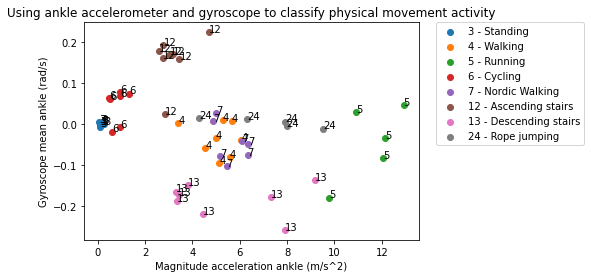

In [218]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','gyroscope mean ankle', 'acceleration magnitude ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
df1 = df1.reset_index()
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping']
plt.figure()
for (i,j) in zip(np.unique(df1['ActivityID']), activity):
    plt.scatter(x = df1.query(f"ActivityID=={i}")['acceleration magnitude ankle'], y=df1.query(f"ActivityID=={i}")['gyroscope mean ankle'], label = f"{i} - {j}" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['gyroscope mean ankle'][i]) )
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Gyroscope mean ankle (rad/s)')
plt.title('Using ankle accelerometer and gyroscope to classify physical movement activity')

Using a combination of gyroscope and accelerometer data from the ankle gives a good indication of the intensity and the elevation levels of natural movement activities such as walking, ascending/descending stairs (similar to walking up and down a hill) and running. We can use clustering techniques and label each cluster with the characteristics of the activity in the model testing section. 

Since activity 6 and activity 24 did not fit the natural movement category due to their different motions, their inclusion does not provide extra insight into our objective therefore both these activities will be eliminated from further analysis and we will focus on providing insights from natural movement activities. 

## IMU ankle 3-D magnetometer data

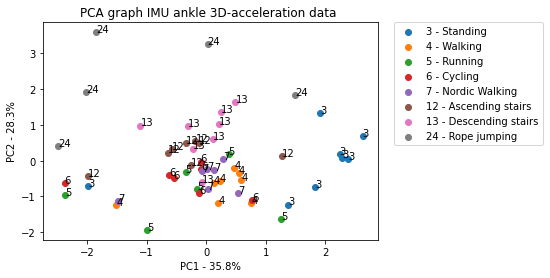

In [219]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['IMU ankle 3D-magnetometer data (1)','IMU ankle 3D-magnetometer data (2)', 'IMU ankle 3D-magnetometer data (3)']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
df1 = df1.reset_index()
scaled_data = preprocessing.scale(df1)
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #the variance of PCA axis
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data)
pca_df.columns= ['PC1', 'PC2','PC3', 'PC4']
pca_df['ActivityID']=(df1['ActivityID'])
activity = ['Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walking', 'Ascending stairs', 'Descending stairs', 'Rope jumping']
plt.figure()
for (i,j) in zip(np.unique(pca_df['ActivityID']), activity):
    plt.scatter(x = pca_df.query(f"ActivityID=={i}")['PC1'], y= pca_df.query(f"ActivityID=={i}")['PC2'], label = f"{i} - {j}",  cmap='plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('PCA graph IMU ankle 3D-acceleration data ')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (pca_df['PC1'].loc[i], pca_df['PC2'].loc[i]) )
plt.show()

The PCA graph forms a cluster in the middle with a wide range of activities. The activities do not seem to cluster according to the type of activity. The 3-D magnetometer data in the ankle does not provide insights on the characteristics of the physical movement activity thus it will not be used further for classification of activities.

# Hypothesis testing

Based on the exploratory data analysis, we can form a few hypotheses. The first hypothesis is that if the gyroscope sensor in the ankle is able to detect ascending and descending stairs, then the ascending stairs activity will have a higher gyroscope mean ankle value for all three axis, compared to descending stairs. The null hypothesis would be that there is no significant difference in IMU gyroscope 3-D mean ankle value between ascending and descending stairs. We will use a paired t-test/Wilcoxon test depending on the normality of the test. 

#### Normality check using Shapiro Wilk test

In [5]:
#grouping the data frame
df1 = pd.DataFrame()

for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','acceleration magnitude ankle', 'gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()

In [6]:
#Normality checks using Shapiro Wilko test for ascending (12) and descending (13) stairs activity 
gyro1=df1.query('ActivityID==12')['gyroscope mean ankle']
gyro2=df1.query('ActivityID==13')['gyroscope mean ankle']
gyro1_test = stats.shapiro(gyro1)
gyro2_test = stats.shapiro(gyro2)
print(gyro1_test)
print(gyro2_test)

ShapiroResult(statistic=0.752530038356781, pvalue=0.008711474016308784)
ShapiroResult(statistic=0.9313971400260925, pvalue=0.528878390789032)


The Shapiro Wilk normality tests shows that the average gyroscope value in the ankle for ascending stairs does not have normal distribution (p<0.05) while descending stairs has normal distribution (p>0.05). Therefore we will use parametric and non-parametric tests to statistically calculate the signficance ofthe gyroscope mean ankle value between ascending and descending stairs for each subject.

#### T-test and Wilcoxon signed-rank test

In [54]:
#Wilcoxon test of gyroscope mean ankle value between ascending and descending stairs
stats.wilcoxon(gyro2,gyro1)

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

In [55]:
#T-test of gyroscope mean ankle value between ascending and descending stairs
df_1= df1.query('ActivityID == 12')
df_2= df1.query('ActivityID == 13')
T_scipy = stats.ttest_rel(df_2['gyroscope mean ankle'],df_1['gyroscope mean ankle'])
T_scipy

Ttest_relResult(statistic=-11.837222613761632, pvalue=6.968297263745504e-06)

Both t-test/wilcoxon comparisons tests have a statistically significant p-value (p<0.05). Therefore we can reject the null hypothesis. In natural language terms, this means that there is significant difference between ascending and descending stairs when using the average gyroscope value across all three axis in the ankle. This is a useful tool for classifying natural movement across inclined/declined surfaces.

#### Correlation coefficient

From the exploratory data anlaysis, there was a positive correlation between the average magnitude of acceleration using an ankle sensor and the average heart rate when comparing standing, walking and running activities. This is insightful since it can allow us to predict the heart rate of an individual based on their magnitude of acceleration during outdoor cardiovascular exercise. The hypothesis is that if magnitude of acceleration is related to the average heart rate in natural movement category then as magnitude of acceleration in the ankle increases, the average heart rate also increases for standing, walking and running activities. A strong positive correlation will suggest the hypothesis is valid. In priciple this makes sense, since the greater the magnitude of acceleration for an activity, the more energy is exerted and thus the larger the mean heart rate levels. The null hypothesis is that there is no association between magnitude of acceleration in the ankle and average heart rate when comparing standing, walking and running activities. We need to control factors such as elevation level therefore ascending and descending stairs activity will be eliminated since it may influence the magnitude of acceleration in the ankle.

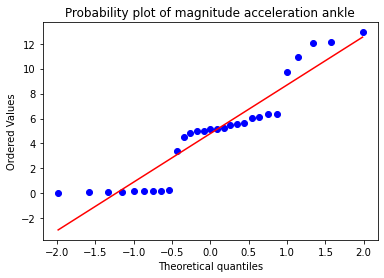

In [41]:
df1 = pd.DataFrame()
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
#Normality checks
#probability plot of magnitude of acceleration in the ankle
stats.probplot(df1['acceleration magnitude ankle'], dist = "norm", plot =pylab)
pylab.title('Probability plot of magnitude acceleration ankle')
pylab.show()

The data is not normally distributed thus we will use Spearman's correlation coefficient rather than Pearson's correlation.

Spearman's correlation coefficient is SpearmanrResult(correlation=0.799671592775041, pvalue=3.3049242269177577e-07)


<Figure size 432x288 with 0 Axes>

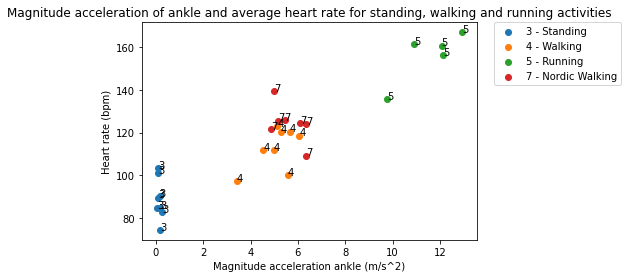

In [225]:
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['Heart rate (bpm)','acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
df1 = df1.reset_index()
activity = ['Standing', 'Walking', 'Running', 'Nordic Walking']
plt.figure()
for (i,j) in zip(np.unique(df1['ActivityID']), activity):
    plt.scatter(x = df1.query(f"ActivityID=={i}")['acceleration magnitude ankle'], y=df1.query(f"ActivityID=={i}")['Heart rate (bpm)'], label = f"{i} - {j}" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['Heart rate (bpm)'][i]) )
x_array= df1['acceleration magnitude ankle']
y_array= df1['Heart rate (bpm)']
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Heart rate (bpm)')
plt.title('Magnitude acceleration of ankle and average heart rate for standing, walking and running activities')
#Calculating Spearman's rank correlation coefficient for the above data
spearmanr=stats.spearmanr(x_array, y_array)
print("Spearman's correlation coefficient is {}".format(spearmanr))

The correlation coefficient value suggests that there is a strong positive correlation between the two variables (0.80). The p value is much less than 0.05 hence we have strong evidence to reject the null hypothesis and potentially accept alternate hypothesis since the correlation coefficient is very high. In natural language terms, this means that if magnitude of acceleration in the ankle increases, the average heart rate also increases for standing, walking and running activities and this association is not due to chance. We can use this strong positive correlation to build a linear regression model which predicts intensity of physical outdoor cardivascular exercise.  

# Model Testing

## Agglomerative Clustering model

The first model will use Agglomerative clustering to classify the activities in natural movement category. From the exploratory data analysis, we recognised different levels of magnitude acceleration of the ankle for all three axis when comparing standing, walking and running. Additionally, the mean gyroscope value of the ankle for all three axis is able to significantly distinguish between ascending and descending stairs and detect the level of elevation. Therefore, we can combine these two variables and use Agglomerative clustering as a model to differentiate between each activity. The reason I use Ward linkage Agglomerative Clustering over other linkage methods or K-means clustering is because it is the best clustering technique for accurately splitting the data points into the correct cluster according to magnitude of acceleration and gyroscope data. The other clustering techniques are shown in the appendix and why they were not used.

<Figure size 432x288 with 0 Axes>

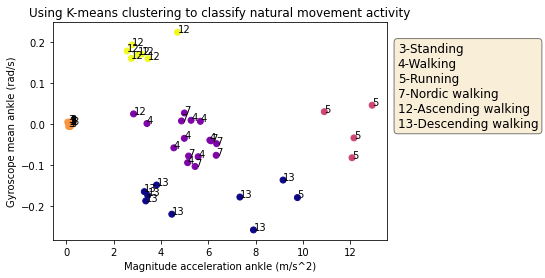

<Figure size 432x288 with 0 Axes>

In [33]:
from sklearn.cluster import AgglomerativeClustering as Agg
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
X = StandardScaler().fit_transform(df1) #Data is now spread across both axis hence K means can be predicted
df1 = df1.reset_index()
linkage='ward' # Ward linkage type
agg_clf=Agg(linkage=linkage,n_clusters=5)
agg_clf.fit(X)
labels=agg_clf.fit_predict(X) #predict each point to one of 5 clusters
df1['labels'] = labels
plt.scatter(df1['acceleration magnitude ankle'], df1['gyroscope mean ankle'], c=labels,  alpha=1.0, cmap='plasma' )
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['gyroscope mean ankle'][i]) )
#Text which labels each ActivityID
textstr = '\n'.join((
    r'3-Standing', 
    r'4-Walking',
    r'5-Running', 
    r'7-Nordic walking',
    r'12-Ascending walking',
    r'13-Descending walking'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(14, 0.2, textstr, fontsize=12,
        verticalalignment='top', bbox=props)
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Gyroscope mean ankle (rad/s)')
plt.title('Using Agglomerative clustering to classify natural movement activity')
plt.figure()

Different colors represent the different clusters resulting from the application of the Agglomerative clustering algorithm. The algorithm correctly seperates the 5 different groups according to activity. The 5 clusters can be labelled according to it's characteristics. The 5 clusters are stationary (orange) cluster which includes standing activity (3), walking on flat surface (purple) cluster which includes walking and Nordic walking activity (4 and 7), inclined walking (yellow) cluster which includes ascending stairs activity (12), declined walking (dark blue) cluster which includes descending stairs activity (13) and running (magenta) cluster which includes running activity (5). There are a few cases where Agglomerative clustering didn't correctly identify the activity to the right cluster however these results are outliers. For example, one of the running (ActivityID=5) data is in the wrong cluster due to it's smaller magnitude of acceleration and gyroscope mean ankle amount compared to the others. Also, one of the ascending stairs (ActivityID=12) data has lower than normal gyroscope mean value and is in the walking on flat surface clustering group. However majority of the data is clustered correctly. We now know that utilising the data for magnitude of acceleration of ankle for the three axis data and gyroscope mean data of ankle for the three axis will aid in the classification of natural movement activity. This insight is useful for any wearable devices in the ankle which can aid in recognising/classification of cardiovascular activities. We can use this model to predict the characteristics of outdoor cardiovascular activity. For example we can predict the elevation level using mean gyroscope amount and intensity of exercise using Magnitude of acceleration and place it in one of the 5 clusters.

## Linear Regression Model

We can test a model which predicts the percentage of maximum heart rate depending on magnitude of acceleration in the ankle. The percentage of maximum heart rate gives us information on the intensity of activity and how close the individual is to the target heart rate. Going back to aims of the data analysis, we are looking at natural movement and we want to classify how intensely one is moving. For example, this model could be useful for someone who goes for a jog/run and wants to lose weight. Moderate exercise intensity is around 50-70% of maximum heart rate and vigorous activity is around 70-85% of maximum heart rate. Therefore the model can predict the intensity of their exercise. The target heart rate is seen as the "sweet spot" between not exercising hard enough and overexerting and it lies between the 50-85% of max heart rate (Target Heart Rates Chart, 2021). Someone who is trying to lose weight will want to reach the vigorous exercise intensity levels. Additionally, exercising regularly in this target heart rate is important for long term cardiovascular endurance and benefits. Therefore the model can be a useful tool to inform these active indivudals about the intensity of their exercise. Since we are using the attributes of magnitude of acceleration in the three axis, there are assumptions of this model. The results are only valid for natural movement activities e.g. walking, jogging and running on flat surfaces/no slopes. We can use the Agglomerative clustering model or gyroscope data to identify any elevation levels during the run. When elevation levels is detected, there shouldn't be percentage of max heart rate displayed since the result will not be accurate. If this model accurately predicts the percentage max heart rate then heart rate sensors may not be necessary.

Although we have data for ascending/descending stairs, this is not enough for an accurate model which is informative of different paces at different slope levels. More data would need to be collected which includes walking/running for ascending/descending stairs. This would allow comparison of the heart rate levels and magnitude of acceleration levels when walking at incline/decline surfaces vs running at incline/decline surfaces. This data could be incorporated into the model.

We will develop a linear regression model using the training set and test how well the test data fits this model. The training/test data split is 80% training and 20% test. The reason for choosing a linear regression model over polynomial regression is because the spearman's rank correlation coefficient in the hypothesis testing section for this data showed strong positive correlation therefore linear regression makes most sense.

[45.36874849]
[[3.11027753]]


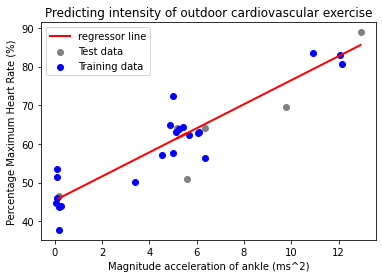

50% of max heart rate: [[1.48901552]]
70% of max heart rate: [[7.91930987]]
85% of max heart rate: [[12.74203063]]
Mean Absolute Error: 4.288358188726632
Mean Squared Error: 33.1036482539967
Root Mean Squared Error: 5.753576996442883


In [40]:
X = df1['acceleration magnitude ankle'].values.reshape(-1,1)
y = df1['Percentage Max HR'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

x1= (50-(regressor.intercept_))/(regressor.coef_)
x2= (70-(regressor.intercept_))/(regressor.coef_)
x3= (85-(regressor.intercept_))/(regressor.coef_)

plt.scatter(X_test, y_test,  color='gray', label='Test data')
plt.scatter(X_train, y_train, color= 'blue', label= 'Training data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='regressor line')
plt.xlabel('Magnitude acceleration of ankle (m/s^2)')
plt.ylabel('Percentage Maximum Heart Rate (%)')
plt.title('Predicting intensity of outdoor cardiovascular exercise')
plt.legend()
plt.show()

print('50% of max heart rate:', (x1))
print('70% of max heart rate:', x2)
print('85% of max heart rate:', x3)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The root mean square error tells us, on average, how close each test data point is from the regression line, which is calculated from the training data. We got a value of 5.75 hence each test data point is on average 5.75% of max heart rate away from the regressor line. The average magnitude of acceleration required for 50% max heart rate (mimimum value to be classified as moderate exercise) is 1.49m/s$^2$ , 70% of max heart rate (minimum value to be classified as vigorous exercise) requires 7.92 m/s$^2$ and 85% of max heart rate (maximum value to be classified as vigorous exercise) requires 12.74 m/s$^2$. Anything beyond this magnitude of acceleration is classified as very intense level of activity. This model predicts the intensity of cardiovascular activity and can be used in conjuction with the Agglomerative cluster model which tries to classify the natural movement activity. Both the models are aligned with the aims of this report. 

# Discussion

The purpose of this task was to provide actionable insights for hardware/software that determines the amount and type of physical activity. My findings focussed on providing insights from cardiovascular activities using ankle sensors. As we know, many people go on outdoor runs to remain healthy and fit. These individuals would find it insightful to know the intensity of their exercise. For example, someone going on regular outdoor jogs may think they are exercising adequately however they are below their target percentage max heart rate (required for good cardiovascular health) or they may not be exercising to the intensity they want to exercise at. Alternatively, there may be individuals who are over-exercising which can lead to burnout and is also not good for cardiovascular health. The average magnitude of acceleration is used to predict the average heart rate and intensity of cardiovascular exercise. Someone who is sprinting will have higher average magnitude of acceleration than someone who is jogging. The individual that is sprinting will have a much greater average heart rate and percentage of max heart rate than the one that is jogging, hence larger intensity of exercise. The findings are useful for individuals that would wear a device on their ankle while conducting their outdoor cardiovascular exercise i.e. going for an outdoor jog. They would gain insights on their elevation level (gyroscope data) and intensity of exercise depending on the average magnitude of acceleration. The individual should be able to see the results on an application on their phone based on the results from the ankle sensor. 

As expected, there are some caveats/assumptions from the linear regression model. Firstly, the predicted average percentage of max heart rate is dependent on many factors beyond just the magnitude of acceleration. This includes age, sex, background, cardiovascular health etc. Additionally, as mentioned before, the model assumes no elevation levels which is not realistic. An outdoor run would have varying elevation levels and the model does not take this factor into account. There should be different models made depending on the elevation levels, using combination of accelerometer and gyroscope data. This would require more data to be collected at different elevation levels. There are 9 subjects in the dataframe and only 5 subjects that carried out the running activity. This is not a large enough sample size for accurate conclusions to be made. Additionally, there is more data points of mean magnitude acceleration for walking (15) compared to running (5) which is a large difference. Furthermore, the 9 subjects are middle aged individuals (27.22 ± 3.31 years) therefore other age ranges are not included in the model. One of the subjects is also female which may have different results to the majority male. I did not delete the female subject since the sample size is already very low and Max heart rate does not change for male and female. Finally, the amount of time spent on physical movement activity by the subjects is very low (around 3 mins) compared to a normal 'outdoor cardiovascular session' which usually lasts more than 3 minutes. A longer running session will impact the average heart rate. The root mean squared error of the regression model is 5.75% of max heart on average for each test data. Therefore the predicted percentage of Max heart rate is not entirely accurate. This is expected with any model but we want to give the insights to the individual on the intensity of their exercise where we categorise moderate intensity and vigorous intensity dependent on the predicted percentage of Max heart rate. Therefore the error value is not too big of an issue. 

Future studies will have to take into account many of the above caveats/assumptions. To further advance the model/classification, there needs to be more relevant data collected. Rather than one model fits all demographics, there needs to be many models which includes variety of data. For example, a more complicated model can be formed which includes 3-D accelerometer and gyroscope data and takes into account elevation levels of the outdoor run to predict intensity of cardiovascular activity. More data needs to be collected from subjects conducting a variety of cardiovascular activities for a longer period of time. The activities should involve walking/jogging/running at different elevation levels. The time spent on each activity should be minimum 15 minutes which represents an average outdoor run. 

# Summary
The core findings are that gyroscope data in ankle informs us of the level of elevation and can significantly distinguish between ascending and descending stairs, the magnitude of acceleration data in the ankle is able to distinguish between standing, walking and running activities. We can combine accelerometer and gyroscope data and divide data points into clusters to identify the characteristics of a natural movement cardiovascular activity. The 5 cluster categories that accelerometer and gyroscope data is accurately able to identify in natural movement category is stationary activities, walking, inclined walking, declined walking and running. The magnitude of acceleration data in the ankle is a good predictor of the percentage of max heart rate which indicates the intensity of natural movement cardiovascular exercise. However this model has many caveats and assumptions therefore the model is not accurate for predicting intensity of real world outdoor cardiovascular activities. I would suggest collecting more data using accelerometer and gyroscope sensors, with a wide range of activities performed by subjects that incorporates many conditions i.e. elevation levels, to provide a more accurate model. 

# References

# Appendix

## K-means clustering

<Figure size 432x288 with 0 Axes>

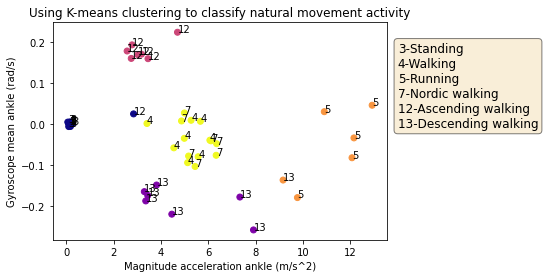

<Figure size 432x288 with 0 Axes>

In [36]:
#K-means clustering
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
kmeans = KMeans(n_clusters=5) #number of clusters
X = StandardScaler().fit_transform(df1) #Data is now spread across both axis hence K means can be predicted
kmeans.fit(X)
labels = kmeans.predict(X) #predict each point to one of 5 clusters
centroids = kmeans.cluster_centers_
df1 = df1.reset_index()
activity = ['Running', 'Standing', 'Inclined walking', 'Declined walking', 'Declined walking' ]
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = map(lambda x: colmap[x+1], labels)
df1['labels'] = labels
plt.scatter(df1['acceleration magnitude ankle'], df1['gyroscope mean ankle'], c=labels,  alpha=1.0, cmap='plasma' )
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['gyroscope mean ankle'][i]) )
#Text which labels each ActivityID
textstr = '\n'.join((
    r'3-Standing', 
    r'4-Walking',
    r'5-Running', 
    r'7-Nordic walking',
    r'12-Ascending walking',
    r'13-Descending walking'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(14, 0.2, textstr, fontsize=12,
        verticalalignment='top', bbox=props)
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Gyroscope mean ankle (rad/s)')
plt.title('Using K-means clustering to classify natural movement activity')
plt.figure()


One of the Ascending walking activities (12) which has low gyroscope mean value compared to the other is clustered with the standing cluster (dark blue) rather than the walking cluster (yellow). This is incorrect clustering hence K-means clustering method is not used.

## Agglomerative complete linkage clustering

<Figure size 432x288 with 0 Axes>

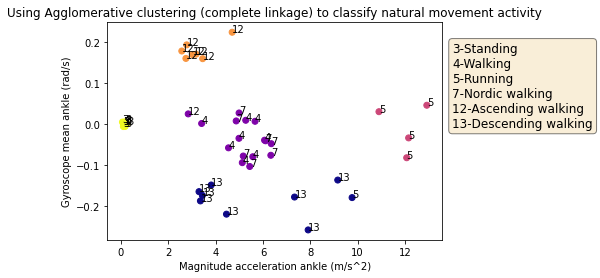

<Figure size 432x288 with 0 Axes>

In [51]:
from sklearn.cluster import AgglomerativeClustering as Agg
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
X = StandardScaler().fit_transform(df1) #Data is now spread across both axis hence K means can be predicted
df1 = df1.reset_index()
linkage='complete'
agg_clf=Agg(linkage=linkage,n_clusters=5)
agg_clf.fit(X)
labels=agg_clf.fit_predict(X) #predict each point to one of 5 clusters
df1['labels'] = labels
plt.scatter(df1['acceleration magnitude ankle'], df1['gyroscope mean ankle'], c=labels,  alpha=1.0, cmap='plasma' )
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['gyroscope mean ankle'][i]) )
#Text which labels each ActivityID
textstr = '\n'.join((
    r'3-Standing', 
    r'4-Walking',
    r'5-Running', 
    r'7-Nordic walking',
    r'12-Ascending walking',
    r'13-Descending walking'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(14, 0.2, textstr, fontsize=12,
        verticalalignment='top', bbox=props)
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Gyroscope mean ankle (rad/s)')
plt.title('Using Agglomerative clustering (complete linkage) to classify natural movement activity')
plt.figure()

The complete linkage Agglomerative clustering technique leads to identical clustering results compared to ward linkage. This method of clustering could have also been used.

## Agglomerative average linkage clustering

<Figure size 432x288 with 0 Axes>

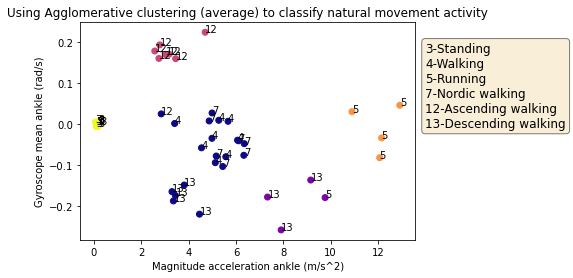

<Figure size 432x288 with 0 Axes>

In [53]:
from sklearn.cluster import AgglomerativeClustering as Agg
#New dataframe
df1 = pd.DataFrame()
#variables of interest grouped by relevant ActivityID
for dfn in dfs_names:
    df = pd.DataFrame(dfs[dfn].groupby('ActivityID')[['acceleration magnitude ankle','gyroscope mean ankle']].mean())
    df1 = pd.concat([df, df1])
df1 = df1.dropna()
X = StandardScaler().fit_transform(df1) #Data is now spread across both axis hence K means can be predicted
df1 = df1.reset_index()
linkage='average'
agg_clf=Agg(linkage=linkage,n_clusters=5)
agg_clf.fit(X)
labels=agg_clf.fit_predict(X) #predict each point to one of 5 clusters
df1['labels'] = labels
plt.scatter(df1['acceleration magnitude ankle'], df1['gyroscope mean ankle'], c=labels,  alpha=1.0, cmap='plasma' )
for i, txt in enumerate(df1['ActivityID']):
    plt.annotate(txt, (df1['acceleration magnitude ankle'][i], df1['gyroscope mean ankle'][i]) )
#Text which labels each ActivityID
textstr = '\n'.join((
    r'3-Standing', 
    r'4-Walking',
    r'5-Running', 
    r'7-Nordic walking',
    r'12-Ascending walking',
    r'13-Descending walking'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(14, 0.2, textstr, fontsize=12,
        verticalalignment='top', bbox=props)
plt.xlabel('Magnitude acceleration ankle (m/s^2)')
plt.ylabel('Gyroscope mean ankle (rad/s)')
plt.title('Using Agglomerative clustering (average) to classify natural movement activity')
plt.figure()

This clustering technique doesn't seperate the clusters well based on it's activity. For example the descending walking activity (13) merges with the walking cluster.